In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
condition: 0 = no disease, 1 = disease

In [201]:
data=pd.read_csv('./heart_cleveland_upload.csv')
df=data.copy()

        ## ANALYSE DE FORME
           TARGET :  condition
           LINGE COLONE :  297 x 13
           TYPES DE VARS : 13 int |  1 float
           ANALYSE DE VAR MANQ : non valeur manquants
        ## ANALYSE DE FOND
                   VISUAL DE TARGET :53% du cas negative et 47% positive
            RELATION VAR ET TARGET:
                     trestbps / condition : il m'apparait quand le trestbps augmente alors le probabilites d'etre maladie plus grands

In [202]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


<AxesSubplot:>

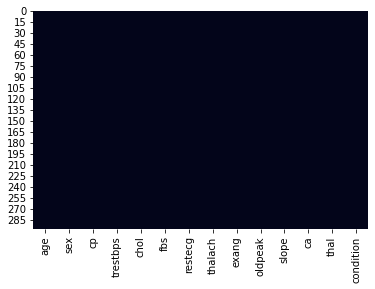

In [203]:
plt.figure()
sns.heatmap(df.isna(),cbar=False)

In [204]:
df[df['condition']==0].count()/df.count()

age          0.538721
sex          0.538721
cp           0.538721
trestbps     0.538721
chol         0.538721
fbs          0.538721
restecg      0.538721
thalach      0.538721
exang        0.538721
oldpeak      0.538721
slope        0.538721
ca           0.538721
thal         0.538721
condition    0.538721
dtype: float64

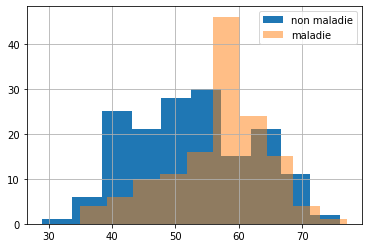

In [205]:
plt.figure()
df['age'][df['condition']==0].hist()
df['age'][df['condition']==1].hist(alpha=0.5)
plt.legend(['non maladie', 'maladie'])
plt.show()

In [206]:
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

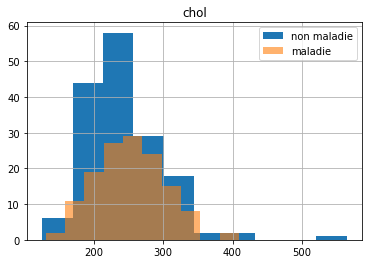

In [207]:
col='chol'
plt.figure()
plt.title(col)
df[col][df['condition']==0].hist()
df[col][df['condition']==1].hist(alpha=0.6)
plt.legend(['non maladie', 'maladie'])


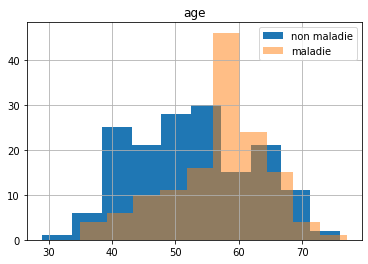

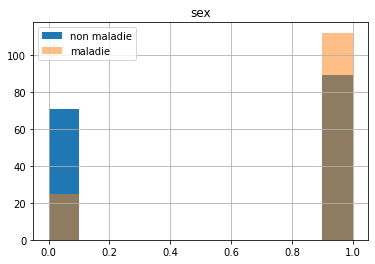

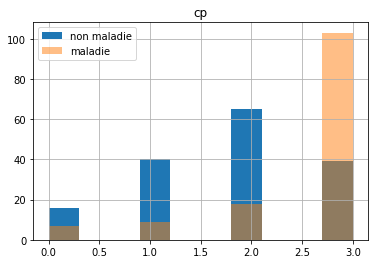

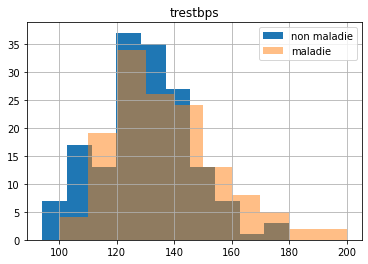

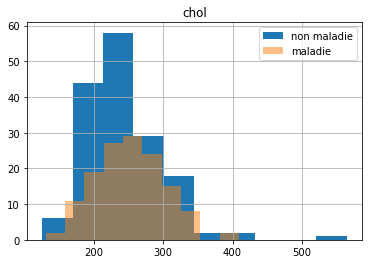

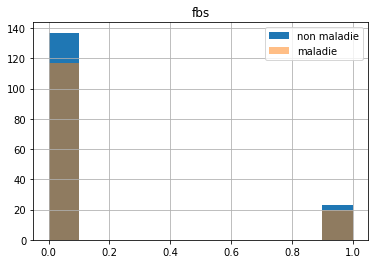

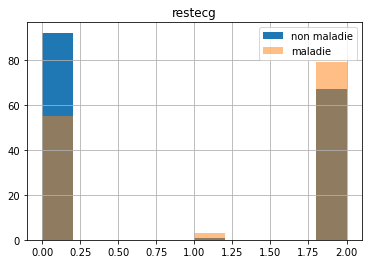

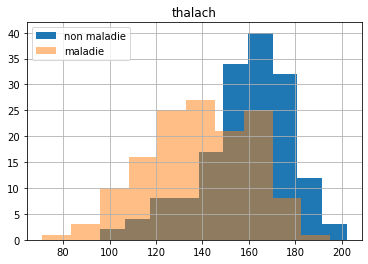

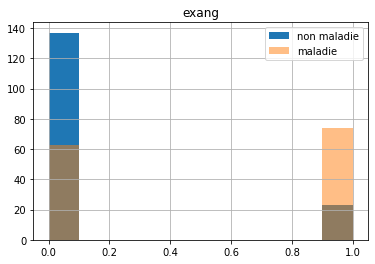

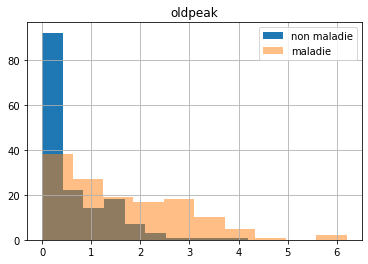

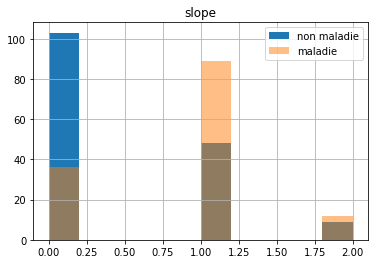

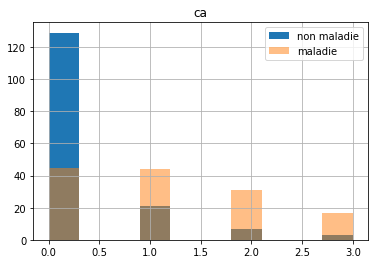

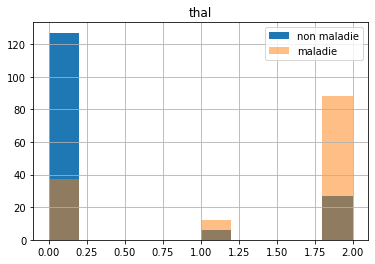

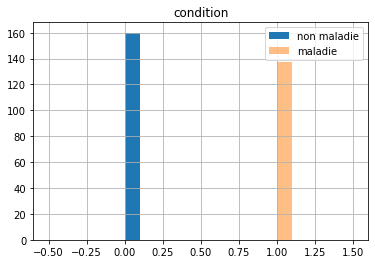

In [208]:
for col in df.columns:
    plt.figure()
    plt.title(col)
    df[col][df['condition']==0].hist()
    df[col][df['condition']==1].hist(alpha=0.5)
    plt.legend(['non maladie', 'maladie'])


In [209]:
impor.sort_values(0)


,0
fbs,-0.316326
thalach,-0.017440
age,-0.003930
chol,0.002051
trestbps,0.010750
restecg,0.087559
slope,0.171638
oldpeak,0.237866
exang,0.382432
cp,0.397394


In [210]:
df=df.drop(['age','restecg','trestbps','chol','thalach'],axis=1)

In [211]:
from sklearn.model_selection import train_test_split
trainset , testset = train_test_split(df,test_size=0.2,random_state=0)
X=trainset.drop('condition',axis=1)
Y=trainset['condition']

X_test=testset.drop('condition',axis=1)
Y_test=testset['condition']


In [212]:
from sklearn import linear_model
from sklearn.svm import SVC

model=SVC(kernel='linear')
model.fit(X,Y)

SVC(kernel='linear')

In [213]:
model.score(X_test,Y_test)


0.8333333333333334

In [214]:
from sklearn.metrics import f1_score , confusion_matrix , classification_report

print(confusion_matrix(Y_test,model.predict(X_test)))
print(classification_report(Y_test,model.predict(X_test)))

[[21  1]
 [ 9 29]]
              precision    recall  f1-score   support

           0       0.70      0.95      0.81        22
           1       0.97      0.76      0.85        38

    accuracy                           0.83        60
   macro avg       0.83      0.86      0.83        60
weighted avg       0.87      0.83      0.84        60



In [225]:
imp = model.coef_
names= X.columns



8

In [226]:
impor = pd.DataFrame(imp.reshape((len(imp[0]),1)),index=names)
impor.sort_values(0)


,0
fbs,-0.232556
sex,0.231249
oldpeak,0.272851
slope,0.299416
cp,0.394599
exang,0.556638
thal,0.599124
ca,0.653689


<AxesSubplot:>

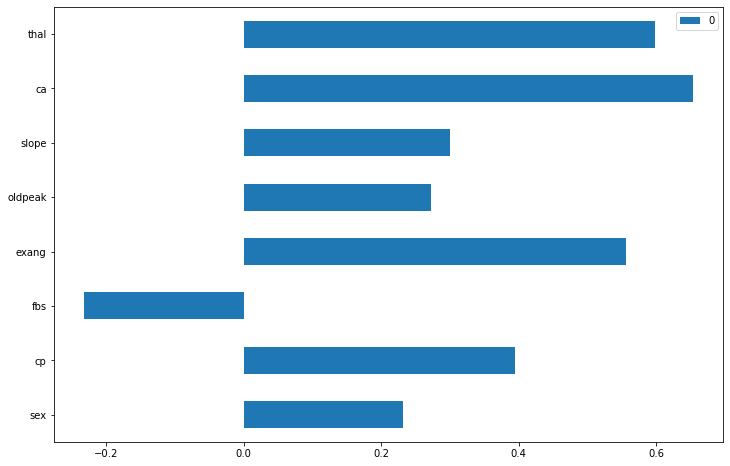

In [227]:
impor.plot.barh(figsize=(12,8))